#**Project Title: Yes Bank Stock Closing Price Prediction - Supervised ML Regression**

#**Data Description**



*   The dataset contains multiple variables - date, open, high, low and close.
*   The column date contains the month and the year of the price of the share.
*   The columns Open and Close represent the starting and final price at which the stock is traded in a particular month.
*   High and Low represent the maximum and minimum price of the share for the month.
*   The profit or loss calculation is usually determined by the closing price of a stock for the month, hence we will consider the closing price as the target variable.


# SOLUTION

**importing necessary libraries**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import datetime as dt
import matplotlib.dates as mdates
import requests
from datetime import datetime


**reading dataset**

In [69]:
yes1=pd.read_csv("yesbank.csv")


In [70]:
yes=yes1.copy()
bank=yes1.copy()

**EDA**

In [71]:
yes.head(3)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30


In [72]:
yes.tail(3)

,Date,Open,High,Low,Close
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


**Dataset Summary**

There are multiple variables in the dataset – **date, open, high, low, close**.

The columns **Open and Close** represent the **starting and final price** at which the stock is traded on a particular day.

**High and Low** represent the **maximum, minimum** of the share for the day.

In [73]:
#checking shape of data
yes.shape


(185, 5)

**interpretation : we have 185 rows and 4 columns**

In [74]:
#getting information about data
yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**interpretation : data has all float datatypes**

In [75]:
#check null values
yes.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**interpretation : there are no null values**

<AxesSubplot:>

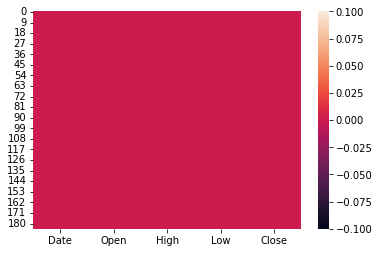

In [76]:
# checking null values using visualisation method

sns.heatmap(yes.isnull(),cbar=True) 

We have 5 columns and 185 rows in the dataset and there are **no null values**.

In [77]:
# data description
yes.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,185,185,Jul-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,185.0,NaN,NaN,NaN,105.541405,98.87985,10.0,33.8,62.98,153.0,369.95
High,185.0,NaN,NaN,NaN,116.104324,106.333497,11.24,36.14,72.55,169.19,404.0
Low,185.0,NaN,NaN,NaN,94.947838,91.219415,5.55,28.51,58.0,138.35,345.5
Close,185.0,NaN,NaN,NaN,105.204703,98.583153,9.98,33.45,62.54,153.3,367.9


**Checking relationship between all variable with target variable**

In [78]:
bank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

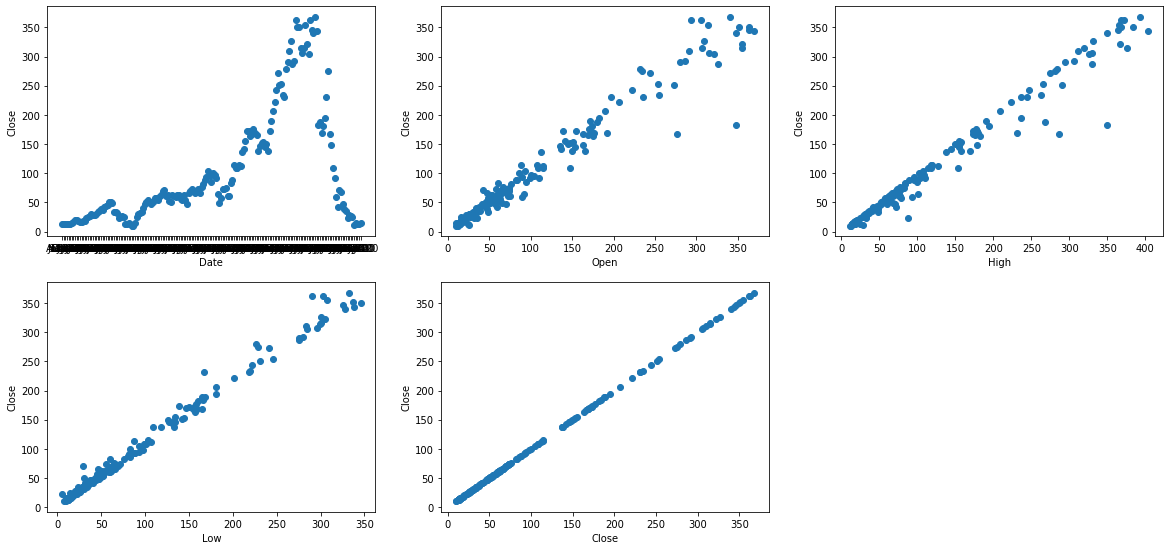

In [79]:
#Plotting the scatter plot
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in bank:
  ax = plt.subplot(12, 3, plotnumber)
  plt.scatter(bank[feature], bank['Close'])
  plt.xlabel(feature)
  plt.ylabel('Close')
  plotnumber+=1

plt.show()

**interpretation = open,high and low are showing linearity to "close" almost **

**convert date into Datetime**

In [90]:
yes['Date'][0:5]

0   2005-07-01
1   2005-08-01
2   2005-09-01
3   2005-10-01
4   2005-11-01
Name: Date, dtype: datetime64[ns]

In [101]:
yes.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [105]:
#setting Date column to index
yes.set_index('Date',inplace=True)


KeyError: "None of ['Date'] are in the columns"

In [106]:
yes.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


## Plotting opening and closing price as per year

Text(0.5, 1.0, 'Closing price history')

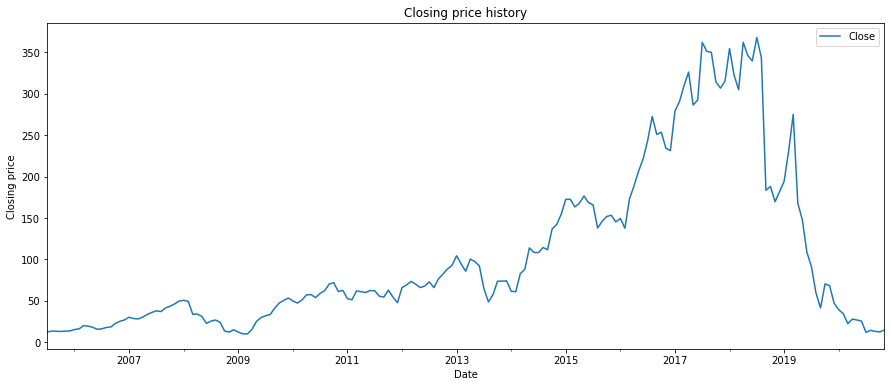

In [107]:
ax=yes[["Close"]].plot(figsize=(15,6))
plt.ylabel('Closing price')
plt.title('Closing price history')

Text(0.5, 1.0, 'Opening price history')

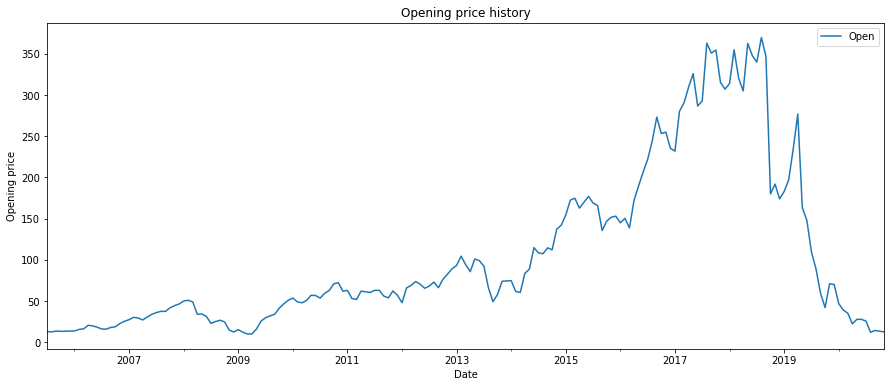

In [108]:
ax=yes[["Open"]].plot(figsize=(15,6))
plt.ylabel('Opening price')
plt.title('Opening price history')

**interpretation = almost opening and closing prices are same**

C:\Python3106\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python3106\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python3106\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

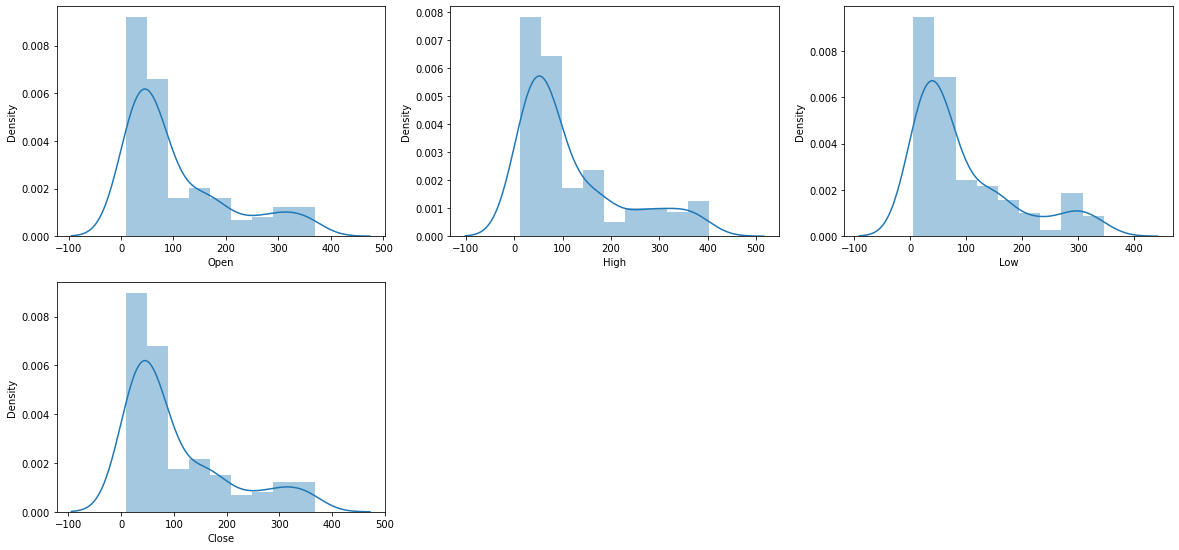

In [109]:
#Plotting distplots for all the columns
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in yes[1:]:
  ax = plt.subplot(12, 3, plotnumber)
  sns.distplot(yes[feature])
  plt.xlabel(feature)
  plotnumber+=1

plt.show()

**interpretation = data seem positively skewed hence it needs normalization but only after we create new features**

In [124]:
#Creating a new dataframe with only date and close columns for sake of simplicity and further implementation.

stockdf = yes['Close'].reset_index()

stockdf['Date'] = pd.to_datetime(stockdf.Date,format='%Y-%m')

In [127]:
stockdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [111]:
# create new columns "year","month" and "quarter"

stockdf['Year']= stockdf['Date'].dt.year
stockdf['Month']= stockdf['Date'].dt.month
stockdf['Quarter']=stockdf['Date'].dt.quarter

In [112]:
stockdf=stockdf.set_index('Date')

In [113]:
stockdf.head()

,Close,Year,Month,Quarter
Date,,,,
2005-07-01,12.46,2005,7,3
2005-08-01,13.42,2005,8,3
2005-09-01,13.30,2005,9,3
2005-10-01,12.99,2005,10,4
2005-11-01,13.41,2005,11,4


create few more **features** to get to know about the **differences** between **opening and closing** price and between **high and low** prices of the shares.

In [130]:
#Normalising the data
from scipy.stats import boxcox
yes['Close']=boxcox(yes['Close'],0)
yes['Open']=boxcox(yes['Open'],0)
yes['High']=boxcox(yes['High'],0.5)
yes['Low']=boxcox(yes['Low'],0.5)


In [133]:
#Creating new features
yes['Open-high'] = yes['Open']-yes['High']
yes['Open-low'] = yes['Open'] -yes['Low']
yes['close-high'] =yes['Close']-yes['High']
yes['close-low'] = yes['Close'] - yes['Low']
yes['high-low'] = yes['High'] - yes['Low']
yes['Open-close'] = yes['Open'] - yes['Close']

C:\Python3106\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python3106\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python3106\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

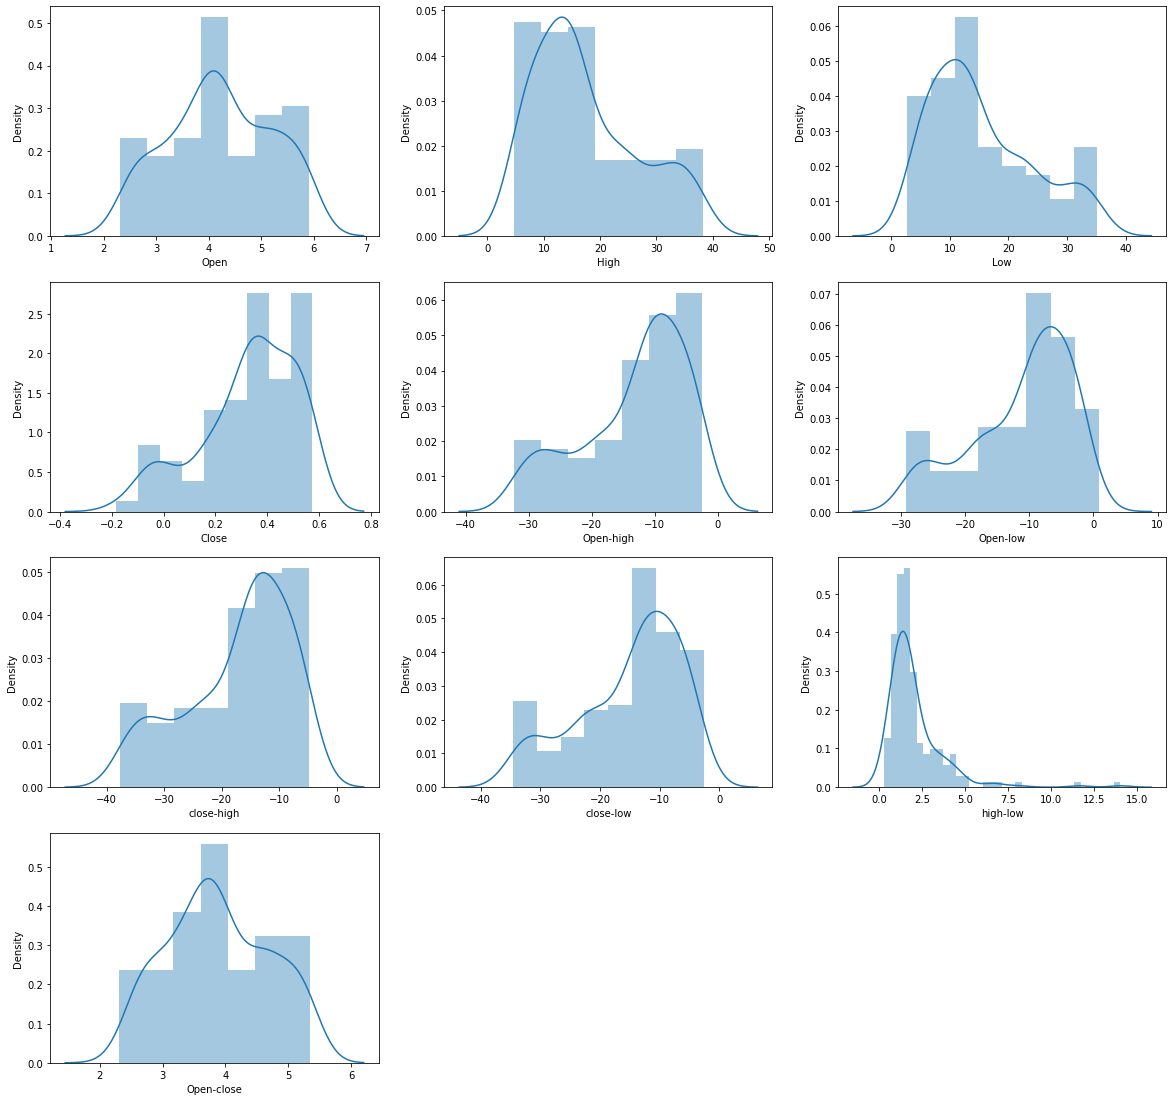

In [134]:
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in yes[:]:
  ax = plt.subplot(12, 3, plotnumber)
  sns.distplot(yes[feature])
  plt.xlabel(feature)
  plotnumber+=1

plt.show()

**interpretation = mostly variables are normally distributed **

<AxesSubplot:>

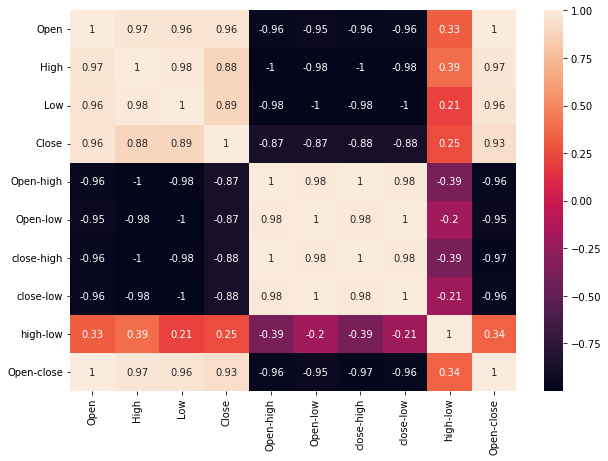

In [135]:
#Plotting a correlation plot
plt.figure(figsize=(10,7))
sns.heatmap(yes.corr(),annot=True)

# scaling

In [8]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()

In [9]:
#scaled=ss.fit_transform(yes)

In [10]:
#scalled=pd.DataFrame(scaled,columns=['Open', 'High', 'Low', 'Close'])

In [11]:
#scalled

In [12]:
target=yes['Close']

In [13]:
yes1=yes.drop('Close',axis=1)

In [20]:
yes1.head()

,Open,High,Low
Date,,,
Jul-05,13.00,14.00,11.25
Aug-05,12.58,14.88,12.55
Sep-05,13.48,14.87,12.27
Oct-05,13.20,14.47,12.40
Nov-05,13.35,13.88,12.88


In [22]:
x_full=yes1
y_full=target
x_full = sm.add_constant(x_full)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_full,y_full,random_state=1,test_size=0.3)

In [25]:

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', x_train.shape)
print('y_train_full', y_train.shape)

# print dimension of test set
print('X_test_full', x_test.shape)
print('y_test_full', y_test.shape)

X_train_full (129, 4)
y_train_full (129,)
X_test_full (56, 4)
y_test_full (56,)


# B A S E M O D E L

In [21]:
import statsmodels
import statsmodels.api as sm

In [26]:
MLR_full_model=sm.OLS(y_train,x_train).fit()

In [27]:
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     8697.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          7.03e-145
Time:                        19:04:05   Log-Likelihood:                -433.36
No. Observations:                 129   AIC:                             874.7
Df Residuals:                     125   BIC:                             886.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2689      0.924      1.373      0.1

#### R-squared : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained
#### Adj. R-squared : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.
#### F-statistic : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.
#### coef : the coefficients of the independent variables and the constant term in the equation.
#### t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error

# MODEL EVALUATION

In [32]:
#R Squred
x=MLR_full_model.rsquared
print("Here in Our case R Squre: ",x ,"percentage target variable explained by Independent variable")

#Ad_R_Squred
b=MLR_full_model.rsquared_adj
print("Here in Our case ADj R Squre: ",b ,"percentage target values explained by Independent variable")

#Condition no
z=MLR_full_model.condition_number
print("Here in Our case Codition number: ",z,"So the multicolinearity is present in data")


#Durbin Wotson
a=2.047
print("Durbin Wotson",a ,"So there is no corelation")

Here in Our case R Squre:  0.9952321298883429 percentage target variable explained by Independent variable
Here in Our case ADj R Squre:  0.9951177010056631 percentage target values explained by Independent variable
Here in Our case Codition number:  371.5968866386382 So the multicolinearity is present in data
Durbin Wotson 2.047 So there is no corelation


# MODEL PERFORMANCE

In [34]:
train_prediced=MLR_full_model.predict(x_train)
train_prediced.head()

Date
Nov-07     46.447157
Mar-09     10.433952
Jan-13    105.241444
Apr-08     31.648390
Oct-09     46.208078
dtype: float64

In [35]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_train,train_prediced)
print("Mean Absolute Error is", round(mae,2))

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,train_prediced)
print("Mean Squred Error is", round(mse,2))

rmse=np.sqrt(mse)
print("Root Mean Squred Error is", round(rmse,2))

Mean Absolute Error is 4.29
Mean Squred Error is 48.47
Root Mean Squred Error is 6.96


C:\Python3106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

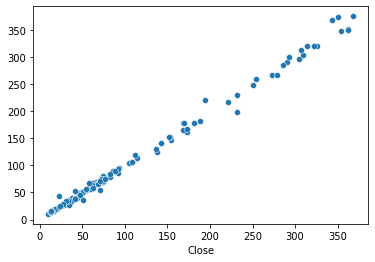

In [37]:
sns.scatterplot(target,train_prediced)